# Setting up Paths

In [1]:
#path to the data
pathCOMPASOutput = '/Volumes/Virgo/DATA/BHNS/Fiducial/'



# Imports

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import h5py as h5
import pandas as pd
import matplotlib.colors as colors
import sys
#Quick fudge to make import from ../Scripts work
import sys
sys.path.append('/Users/floorbroekgaarden/Projects/BHNS_project/Scripts')




# Custom Imports from COMPASrepo

In [3]:
import ClassFormationChannels as FC 
import ClassCosmicIntegrator  as CI #Given settings and redshifts returns rates (2D arrays) Loads the data
import coencodeVarious        as CV

from PostProcessingScripts import *



# Cosmic Integration

In [4]:
#Will only look at BBHs so might as well set everything
minz = 0.
maxz = 2
resz = 200 #200 //floor
sensitivity = 'design'
Data = CI.CosmicIntegrator(COMPASpath = pathCOMPASOutput, DCOtypes='BBH',\
       minRedshift=minz,   maxRedshift=maxz, nrRedshiftBins=resz,\
                           GWdetector_sensitivity=sensitivity,\
                           optimistic=False)
# self,\
#                 Cosmology='WMAP',hubbleConstant = 67.8, omegaMatter=0.308,redshiftFirstSFR=10., \
#                 COMPASpath=None,  COMPASlazyData=True,COMPASMlower=5.,\
#                 COMPASMupper=150.,COMPASbinaryFraction=0.7,COMPASmetallicityGrid=None,\
#                 minRedshift=0.0,   maxRedshift=2., nrRedshiftBins=20,\
#                 DCOtypes=None, withinHubbleTime=True, optimistic=False, 
#                 RedshiftTabulated =True, RedshiftTabulatedResolution=100000,
#                 GWdetector_sensitivity='O1', GWdetector_snrThreshold=8, verbose = False

# model = 'Preferred'



# if model == 'Preferred':
#     Data.MSSFR.Zprescription         = 'logNormal'
#     Data.MSSFR.SFRprescription       = 'Neijssel et al. (2019)'
#     Data.MSSFR.logNormalPrescription = 'Neijssel Phenomenological'

# if model =='Barrett':
#     Data.MSSFR.Zprescription         = 'MZ_GSMF'
#     Data.MSSFR.SFRprescription       = 'Madau et al. (2014)'
#     Data.MSSFR.logNormalPrescription = None
#     Data.MSSFR.GSMFprescription      = 'Panter et al. (2004) Single'
#     Data.MSSFR.ZMprescription        = 'Langer et al. (2006)'



# Data.cosmologicalIntegration()

weighted samples :-D
Remember to  self.setCOMPASDCOmask() adag and self.setCOMPASData()


# Formation channels per seed


In [5]:
fc = FC.FormationChannels(path = pathCOMPASOutput,verbose=False)


# fc.formationChannelsSeeds(types='BNS', withinHubbleTime=True, optimistic=True)

fc.formationChannelsSeeds(seeds=Data.COMPAS.seeds, withinHubbleTime=True, optimistic=False)

(52190.03630234331, 'sum sorted counts')


In [ ]:
index = 49-1
print fc.sortedStrings[index]

print 'I have now accounted for  %s percent', np.sum(fc.sortedCounts[0:index+1])*100 / float(np.sum(fc.sortedCounts))

# SET CHANNELS:

In [30]:


channelSystems  = np.ones(len(fc.rankArray)) * -1



for nrC, Channel in enumerate(dictChannelsBBHList):
    subchannel = np.asarray(dictChannelsBBH[Channel]) -1.
#     print subchannel
#     print nrC
    for nrc, nr_subchannel in enumerate(subchannel):

    
        channelSystems[(fc.rankArray == nr_subchannel)] =nrC
    
print(channelSystems[(channelSystems ==-1.)])
print((channelSystems))
channelSystems[(channelSystems ==-1.)] =4


print np.unique(channelSystems)

[-1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1.
 -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1.
 -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1.
 -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1.
 -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1.
 -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1.
 -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1.
 -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1.
 -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1.
 -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1.
 -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1.
 -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1.
 -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1.
 -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1

In [ ]:
# ones = np.ones(5)
# AA = np.asarray([1,1,2,3,0,0,3])
# print ones
# mask = np.isin(AA, ones)
# print mask

In [ ]:
# cm       = plt.get_cmap('plasma_r')
# nColors  = 12
# mycolors = [cm(x) for x in np.linspace(0,1 , (nColors*2)-1)] 

# ChannelColours = [mycolors[0], mycolors[1], mycolors[4], mycolors[5], \
#                   mycolors[8] , mycolors[12] , mycolors[14], mycolors[16] ]

In [7]:
model = 'Preferred'


if model == 'Preferred':
    Data.MSSFR.Zprescription         = 'logNormal'
    Data.MSSFR.SFRprescription       = 'Neijssel et al. (2019)'
    Data.MSSFR.logNormalPrescription = 'Neijssel Phenomenological'

if model =='Barrett':
    Data.MSSFR.Zprescription         = 'MZ_GSMF'
    Data.MSSFR.SFRprescription       = 'Madau et al. (2014)'
    Data.MSSFR.logNormalPrescription = None
    Data.MSSFR.GSMFprescription      = 'Panter et al. (2004) Single'
    Data.MSSFR.ZMprescription        = 'Langer et al. (2006)'



Data.cosmologicalIntegration()




In [ ]:
# colorlist = ['', '', '' , '', '']
# colorlist[4] = 'gray'
# # snscolor_green = sns.color_palette(sns.light_palette("green",4 , reverse=True))
# snscolor_green =  sns.color_palette("RdBu_r", 7)
# colorlist[0] = snscolor_green[0]

# snscolor_purple = sns.color_palette(sns.light_palette("green", 3 , reverse=True))
# colorlist[1] = snscolor_purple[0]

# # snscolor_blue = sns.color_palette(sns.light_palette("blue",3 , reverse=True))
# snscolor_blue = sns.color_palette("RdBu", 7)
# colorlist[2] = snscolor_blue[0]

# snscolor_orange =  sns.color_palette(sns.xkcd_palette(["amber"]))  # sns.color_palette(sns.light_palette("yellow",3 , reverse=True))
# colorlist[3] = snscolor_orange

# combined plot 6 panel

In [8]:
from scipy.spatial.distance import cdist

class gaussian_kde(object):
    """Representation of a kernel-density estimate using Gaussian kernels.

    Kernel density estimation is a way to estimate the probability density
    function (PDF) of a random variable in a non-parametric way.
    `gaussian_kde` works for both uni-variate and multi-variate data.   It
    includes automatic bandwidth determination.  The estimation works best for
    a unimodal distribution; bimodal or multi-modal distributions tend to be
    oversmoothed.

    Parameters
    ----------
    dataset : array_like
        Datapoints to estimate from. In case of univariate data this is a 1-D
        array, otherwise a 2-D array with shape (# of dims, # of data).
    bw_method : str, scalar or callable, optional
        The method used to calculate the estimator bandwidth.  This can be
        'scott', 'silverman', a scalar constant or a callable.  If a scalar,
        this will be used directly as `kde.factor`.  If a callable, it should
        take a `gaussian_kde` instance as only parameter and return a scalar.
        If None (default), 'scott' is used.  See Notes for more details.
    weights : array_like, shape (n, ), optional, default: None
        An array of weights, of the same shape as `x`.  Each value in `x`
        only contributes its associated weight towards the bin count
        (instead of 1).

    Attributes
    ----------
    dataset : ndarray
        The dataset with which `gaussian_kde` was initialized.
    d : int
        Number of dimensions.
    n : int
        Number of datapoints.
    neff : float
        Effective sample size using Kish's approximation.
    factor : float
        The bandwidth factor, obtained from `kde.covariance_factor`, with which
        the covariance matrix is multiplied.
    covariance : ndarray
        The covariance matrix of `dataset`, scaled by the calculated bandwidth
        (`kde.factor`).
    inv_cov : ndarray
        The inverse of `covariance`.

    Methods
    -------
    kde.evaluate(points) : ndarray
        Evaluate the estimated pdf on a provided set of points.
    kde(points) : ndarray
        Same as kde.evaluate(points)
    kde.pdf(points) : ndarray
        Alias for ``kde.evaluate(points)``.
    kde.set_bandwidth(bw_method='scott') : None
        Computes the bandwidth, i.e. the coefficient that multiplies the data
        covariance matrix to obtain the kernel covariance matrix.
        .. versionadded:: 0.11.0
    kde.covariance_factor : float
        Computes the coefficient (`kde.factor`) that multiplies the data
        covariance matrix to obtain the kernel covariance matrix.
        The default is `scotts_factor`.  A subclass can overwrite this method
        to provide a different method, or set it through a call to
        `kde.set_bandwidth`.

    Notes
    -----
    Bandwidth selection strongly influences the estimate obtained from the KDE
    (much more so than the actual shape of the kernel).  Bandwidth selection
    can be done by a "rule of thumb", by cross-validation, by "plug-in
    methods" or by other means; see [3]_, [4]_ for reviews.  `gaussian_kde`
    uses a rule of thumb, the default is Scott's Rule.

    Scott's Rule [1]_, implemented as `scotts_factor`, is::

        n**(-1./(d+4)),

    with ``n`` the number of data points and ``d`` the number of dimensions.
    Silverman's Rule [2]_, implemented as `silverman_factor`, is::

        (n * (d + 2) / 4.)**(-1. / (d + 4)).

    Good general descriptions of kernel density estimation can be found in [1]_
    and [2]_, the mathematics for this multi-dimensional implementation can be
    found in [1]_.

    References
    ----------
    .. [1] D.W. Scott, "Multivariate Density Estimation: Theory, Practice, and
           Visualization", John Wiley & Sons, New York, Chicester, 1992.
    .. [2] B.W. Silverman, "Density Estimation for Statistics and Data
           Analysis", Vol. 26, Monographs on Statistics and Applied Probability,
           Chapman and Hall, London, 1986.
    .. [3] B.A. Turlach, "Bandwidth Selection in Kernel Density Estimation: A
           Review", CORE and Institut de Statistique, Vol. 19, pp. 1-33, 1993.
    .. [4] D.M. Bashtannyk and R.J. Hyndman, "Bandwidth selection for kernel
           conditional density estimation", Computational Statistics & Data
           Analysis, Vol. 36, pp. 279-298, 2001.

    Examples
    --------
    Generate some random two-dimensional data:

    >>> from scipy import stats
    >>> def measure(n):
    >>>     "Measurement model, return two coupled measurements."
    >>>     m1 = np.random.normal(size=n)
    >>>     m2 = np.random.normal(scale=0.5, size=n)
    >>>     return m1+m2, m1-m2

    >>> m1, m2 = measure(2000)
    >>> xmin = m1.min()
    >>> xmax = m1.max()
    >>> ymin = m2.min()
    >>> ymax = m2.max()

    Perform a kernel density estimate on the data:

    >>> X, Y = np.mgrid[xmin:xmax:100j, ymin:ymax:100j]
    >>> positions = np.vstack([X.ravel(), Y.ravel()])
    >>> values = np.vstack([m1, m2])
    >>> kernel = stats.gaussian_kde(values)
    >>> Z = np.reshape(kernel(positions).T, X.shape)

    Plot the results:

    >>> import matplotlib.pyplot as plt
    >>> fig = plt.figure()
    >>> ax = fig.add_subplot(111)
    >>> ax.imshow(np.rot90(Z), cmap=plt.cm.gist_earth_r,
    ...           extent=[xmin, xmax, ymin, ymax])
    >>> ax.plot(m1, m2, 'k.', markersize=2)
    >>> ax.set_xlim([xmin, xmax])
    >>> ax.set_ylim([ymin, ymax])
    >>> plt.show()

    """
    def __init__(self, dataset, bw_method=None, weights=None):
        self.dataset = np.atleast_2d(dataset)
        if not self.dataset.size > 1:
            raise ValueError("`dataset` input should have multiple elements.")
        self.d, self.n = self.dataset.shape
            
        if weights is not None:
            self.weights = weights / np.sum(weights)
        else:
            self.weights = np.ones(self.n) / self.n
            
        # Compute the effective sample size 
        # http://surveyanalysis.org/wiki/Design_Effects_and_Effective_Sample_Size#Kish.27s_approximate_formula_for_computing_effective_sample_size
        self.neff = 1.0 / np.sum(self.weights ** 2)

        self.set_bandwidth(bw_method=bw_method)

    def evaluate(self, points):
        """Evaluate the estimated pdf on a set of points.

        Parameters
        ----------
        points : (# of dimensions, # of points)-array
            Alternatively, a (# of dimensions,) vector can be passed in and
            treated as a single point.

        Returns
        -------
        values : (# of points,)-array
            The values at each point.

        Raises
        ------
        ValueError : if the dimensionality of the input points is different than
                     the dimensionality of the KDE.

        """
        points = np.atleast_2d(points)

        d, m = points.shape
        if d != self.d:
            if d == 1 and m == self.d:
                # points was passed in as a row vector
                points = np.reshape(points, (self.d, 1))
                m = 1
            else:
                msg = "points have dimension %s, dataset has dimension %s" % (d,
                    self.d)
                raise ValueError(msg)

        # compute the normalised residuals
        chi2 = cdist(points.T, self.dataset.T, 'mahalanobis', VI=self.inv_cov) ** 2
        # compute the pdf
        result = np.sum(np.exp(-.5 * chi2) * self.weights, axis=1) / self._norm_factor

        return result

    __call__ = evaluate

    def scotts_factor(self):
        return np.power(self.neff, -1./(self.d+4))

    def silverman_factor(self):
        return np.power(self.neff*(self.d+2.0)/4.0, -1./(self.d+4))

    #  Default method to calculate bandwidth, can be overwritten by subclass
    covariance_factor = scotts_factor

    def set_bandwidth(self, bw_method=None):
        """Compute the estimator bandwidth with given method.

        The new bandwidth calculated after a call to `set_bandwidth` is used
        for subsequent evaluations of the estimated density.

        Parameters
        ----------
        bw_method : str, scalar or callable, optional
            The method used to calculate the estimator bandwidth.  This can be
            'scott', 'silverman', a scalar constant or a callable.  If a
            scalar, this will be used directly as `kde.factor`.  If a callable,
            it should take a `gaussian_kde` instance as only parameter and
            return a scalar.  If None (default), nothing happens; the current
            `kde.covariance_factor` method is kept.

        Notes
        -----
        .. versionadded:: 0.11

        Examples
        --------
        >>> x1 = np.array([-7, -5, 1, 4, 5.])
        >>> kde = stats.gaussian_kde(x1)
        >>> xs = np.linspace(-10, 10, num=50)
        >>> y1 = kde(xs)
        >>> kde.set_bandwidth(bw_method='silverman')
        >>> y2 = kde(xs)
        >>> kde.set_bandwidth(bw_method=kde.factor / 3.)
        >>> y3 = kde(xs)

        >>> fig = plt.figure()
        >>> ax = fig.add_subplot(111)
        >>> ax.plot(x1, np.ones(x1.shape) / (4. * x1.size), 'bo',
        ...         label='Data points (rescaled)')
        >>> ax.plot(xs, y1, label='Scott (default)')
        >>> ax.plot(xs, y2, label='Silverman')
        >>> ax.plot(xs, y3, label='Const (1/3 * Silverman)')
        >>> ax.legend()
        >>> plt.show()

        """
        if bw_method is None:
            pass
        elif bw_method == 'scott':
            self.covariance_factor = self.scotts_factor
        elif bw_method == 'silverman':
            self.covariance_factor = self.silverman_factor
        elif np.isscalar(bw_method): # and not isinstance(bw_method, string_types):
            self._bw_method = 'use constant'
            self.covariance_factor = lambda: bw_method
        elif callable(bw_method):
            self._bw_method = bw_method
            self.covariance_factor = lambda: self._bw_method(self)
        else:
            msg = "`bw_method` should be 'scott', 'silverman', a scalar " \
                  "or a callable."
            raise ValueError(msg)

        self._compute_covariance()

    def _compute_covariance(self):
        """Computes the covariance matrix for each Gaussian kernel using
        covariance_factor().
        """
        self.factor = self.covariance_factor()
        # Cache covariance and inverse covariance of the data
        if not hasattr(self, '_data_inv_cov'):
            # Compute the mean and residuals
            _mean = np.sum(self.weights * self.dataset, axis=1)
            _residual = (self.dataset - _mean[:, None])
            # Compute the biased covariance
            self._data_covariance = np.atleast_2d(np.dot(_residual * self.weights, _residual.T))
            # Correct for bias (http://en.wikipedia.org/wiki/Weighted_arithmetic_mean#Weighted_sample_covariance)
            self._data_covariance /= (1 - np.sum(self.weights ** 2))
            self._data_inv_cov = np.linalg.inv(self._data_covariance)

        self.covariance = self._data_covariance * self.factor**2
        self.inv_cov = self._data_inv_cov / self.factor**2
        self._norm_factor = np.sqrt(np.linalg.det(2*np.pi*self.covariance)) #* self.n

        
        

def lowess(x, y, f=2. / 3., iter=3):
    """lowess(x, y, f=2./3., iter=3) -> yest
    Lowess smoother: Robust locally weighted regression.
    The lowess function fits a nonparametric regression curve to a scatterplot.
    The arrays x and y contain an equal number of elements; each pair
    (x[i], y[i]) defines a data point in the scatterplot. The function returns
    the estimated (smooth) values of y.
    The smoothing span is given by f. A larger value for f will result in a
    smoother curve. The number of robustifying iterations is given by iter. The
    function will run faster with a smaller number of iterations.
    """
    n = len(x)
    r = int(ceil(f * n))
    h = [np.sort(np.abs(x - x[i]))[r] for i in range(n)]
    w = np.clip(np.abs((x[:, None] - x[None, :]) / h), 0.0, 1.0)
    w = (1 - w ** 3) ** 3
    yest = np.zeros(n)
    delta = np.ones(n)
    for iteration in range(iter):
        for i in range(n):
            weights = delta * w[:, i]
            b = np.array([np.sum(weights * y), np.sum(weights * y * x)])
            A = np.array([[np.sum(weights), np.sum(weights * x)],
                          [np.sum(weights * x), np.sum(weights * x * x)]])
            beta = linalg.solve(A, b)
            yest[i] = beta[0] + beta[1] * x[i]

        residuals = y - yest
        s = np.median(np.abs(residuals))
        delta = np.clip(residuals / (6.0 * s), -1, 1)
        delta = (1 - delta ** 2) ** 2

    return yest






In [9]:
def plotdesigndistribution_hist(axe, xvar, nrbins, xlabel, ylabel, xlim, ylim):
    """ plot total mass distribution with channels """
    groups  = dictChannelsBBHList  

    axes = [axe]
    
    weightSTROOPWAFEL = Data.COMPAS.weight
    

    
    binsM = np.linspace(min(xvar)*0.95,max(xvar)*1.1, nrbins)
    dM    = np.diff(binsM)
    M     = (binsM[1:]+binsM[:-1])/2.

    

    binpoints_x = np.zeros(2*(len(binsM)-1))
    binpoints_y = np.zeros(2*(len(binsM)-1))
    binpoints_x[::2] = binsM[:-1]
    binpoints_x[1::2]= binsM[1:]    

    
    # print len(chirp)
    print np.shape(Data.PerSystemPerRedshift_ratesObserved)
    weights     = np.sum(Data.PerSystemPerRedshift_ratesObserved*weightSTROOPWAFEL, axis=0)
    print np.sum(weights)
    print weights

#     fig, axes = plt.subplots(1,1,figsize=(16,8))
    yLow        = np.zeros(len(binpoints_x))
    for nrG, group in enumerate(groups):
        m       = xvar[channelSystems == nrG]
        w       = weights[channelSystems == nrG]
        percentage = np.round((np.sum(w)/float(np.sum(weights)))*100,2)
        y, _    = np.histogram(m, bins=binsM, weights=w)
        y       = np.divide(y, dM)

        # remake histogram

        binpoints_y[::2]  = y
        binpoints_y[1::2] = y
        
  
        
        
        ##
#         axe.plot(binpoints_x, yLow, yLow+binpoints_y, color=colorlist[nrG])
        axe.fill_between(binpoints_x, yLow, yLow+binpoints_y, facecolor=colorlist[nrG], alpha=0.8)#,\
#                           label=dictChannelsBHNSListBolt[nrG]+' '+str(percentage)+'\%')
        yLow   += binpoints_y
        
    axe.plot(binpoints_x,  yLow+binpoints_y, color='k', linewidth=5)
    ### PLOT CDF on right axes ###
    ax2y = axe.twinx()

    # label / tick settings
    cdfcolor = 'red'
    ylabel2 = 'CDF'

    ax2y.set_ylim(0,1)
    ax2y.tick_params(labelsize=fs, colors=cdfcolor)
    ax2y.set_ylabel(ylabel2, fontsize=fs, color=cdfcolor)       
    
    # plot cdf:
    ax2y.hist(xvar, normed=True, bins=len(xvar), cumulative=True, label=None,
         histtype='step', alpha=1, color=cdfcolor, linewidth=3, linestyle='-.', zorder=10, weights=weights)    
    
    ###########
    if xlim:
        axe.set_xlim(xlim[0], xlim[1])
    if ylim:
        axe.set_ylim(ylim[0], ylim[1])

    axe == CV.layoutAxes(axe, nameX=xlabel, nameY=ylabel)


    axe.grid(True)

In [36]:
def plotdesigndistribution(axe, xvar, nrbins, xlabel, ylabel, xlim, ylim, indplot):
    """ plot total mass distribution with channels """
    groups  = dictChannelsBBHList  

    axes = [axe]
    
    weightSTROOPWAFEL = Data.COMPAS.weight
    

    
    binsM = np.linspace(min(xvar)*0.95,max(xvar)*1.1, 10)
    dM    = np.diff(binsM)
    M     = (binsM[1:]+binsM[:-1])/2.

    

    binpoints_x = np.zeros(2*(len(binsM)-1))
    binpoints_y = np.zeros(2*(len(binsM)-1))
    binpoints_x[::2] = binsM[:-1]
    binpoints_x[1::2]= binsM[1:]    

    
    # print len(chirp)
    print np.shape(Data.PerSystemPerRedshift_ratesObserved)
    weights     = np.sum(Data.PerSystemPerRedshift_ratesObserved*weightSTROOPWAFEL, axis=0)
    print np.sum(weights)
    print weights
    totalweight = 0

#     fig, axes = plt.subplots(1,1,figsize=(16,8))
    xx_boot = np.linspace(min(xvar)*0.8,max(xvar)*1.2, 100)
    yLow        = np.zeros(len(xx_boot))
#     bw = (max(xx_boot) - min(xx_boot))*nrbins
    
    for nrG, group in enumerate(groups):
        m       = xvar[channelSystems == nrG]
        w       = weights[channelSystems == nrG]
        percentage = np.round((np.sum(w)/float(np.sum(weights)))*100,2)
        y, _    = np.histogram(m, bins=binsM, weights=w)
        y       = np.divide(y, dM)

        # remake histogram
    

        totalweight += np.sum(w)
        totalweight_nrG = np.sum(w)
        ##
        
        KDE = gaussian_kde(m, weights=w, bw_method = nrbins)
        y_boot = KDE(xx_boot)

        
        ##
        if indplot==0:
            LABEL = dictChannelsBHNSListBolt[nrG]+' '+str(percentage)+'\%'
            print(LABEL)
        else:
            LABEL = None
            
            
        axe.fill_between(xx_boot, yLow, yLow+(y_boot*totalweight_nrG), facecolor=colorlist[nrG], alpha=0.8, label=LABEL)#,\
#                           label=)
        yLow   +=y_boot*totalweight_nrG
    
#     axe.fill_between(xx_boot, yLow, yLow+(y_boot*totalweight_nrG), facecolor=colorlist[nrG], alpha=0.8, label=LABEL)#,\
# #                           label=)
    # plot thick black line on top of overall distribution    
    axe.plot(xx_boot,  (yLow), color='k', linewidth=5)
    
    ### PLOT CDF on right axes ###
    ax2y = axe.twinx()

    # label / tick settings
    cdfcolor = 'red'
    ylabel2 = 'CDF'

    ax2y.set_ylim(0,1)
    ax2y.tick_params(labelsize=fs, colors=cdfcolor)
    ax2y.set_ylabel(ylabel2, fontsize=fs, color=cdfcolor)       
    
    # plot cdf:
    ax2y.hist(xvar, normed=True, bins=len(xvar), cumulative=True, label=None,
         histtype='step', alpha=1, color=cdfcolor, linewidth=3, linestyle='-.', zorder=10, weights=weights)    
    
    ###########
    if xlim:
        axe.set_xlim(xlim[0], xlim[1])
    if ylim:
        axe.set_ylim(ylim[0], ylim[1])

    axe == CV.layoutAxes(axe, nameX=xlabel, nameY=ylabel)

    
    if indplot==0: 
        handles, labels = axe.get_legend_handles_labels()
    else:
        handles, labels = None, None
        
    axe.grid(True)
    
    
    return handles, labels
    

In [37]:
# # print(colorlist[nrG])
# colorlist = ['gray','gray','gray','gray','gray']

(200, 382737)
214.13693503263548
[0.         0.         0.         ... 0.00018496 0.00010892 0.00116791]
\textbf{Classic} 24.27\%
\textbf{Only stable mass transfer} 72.31\%
\textbf{Immediate single-core CE } 0.24\%
\textbf{Immediate double-core CE} 0.63\%
\textbf{other} 2.54\%
(200, 382737)
214.13693503263548
[0.         0.         0.         ... 0.00018496 0.00010892 0.00116791]
(200, 382737)
214.13693503263548
[0.         0.         0.         ... 0.00018496 0.00010892 0.00116791]
(200, 382737)
214.13693503263548
[0.         0.         0.         ... 0.00018496 0.00010892 0.00116791]
(200, 382737)
214.13693503263548
[0.         0.         0.         ... 0.00018496 0.00010892 0.00116791]
(200, 382737)
214.13693503263548
[0.         0.         0.         ... 0.00018496 0.00010892 0.00116791]


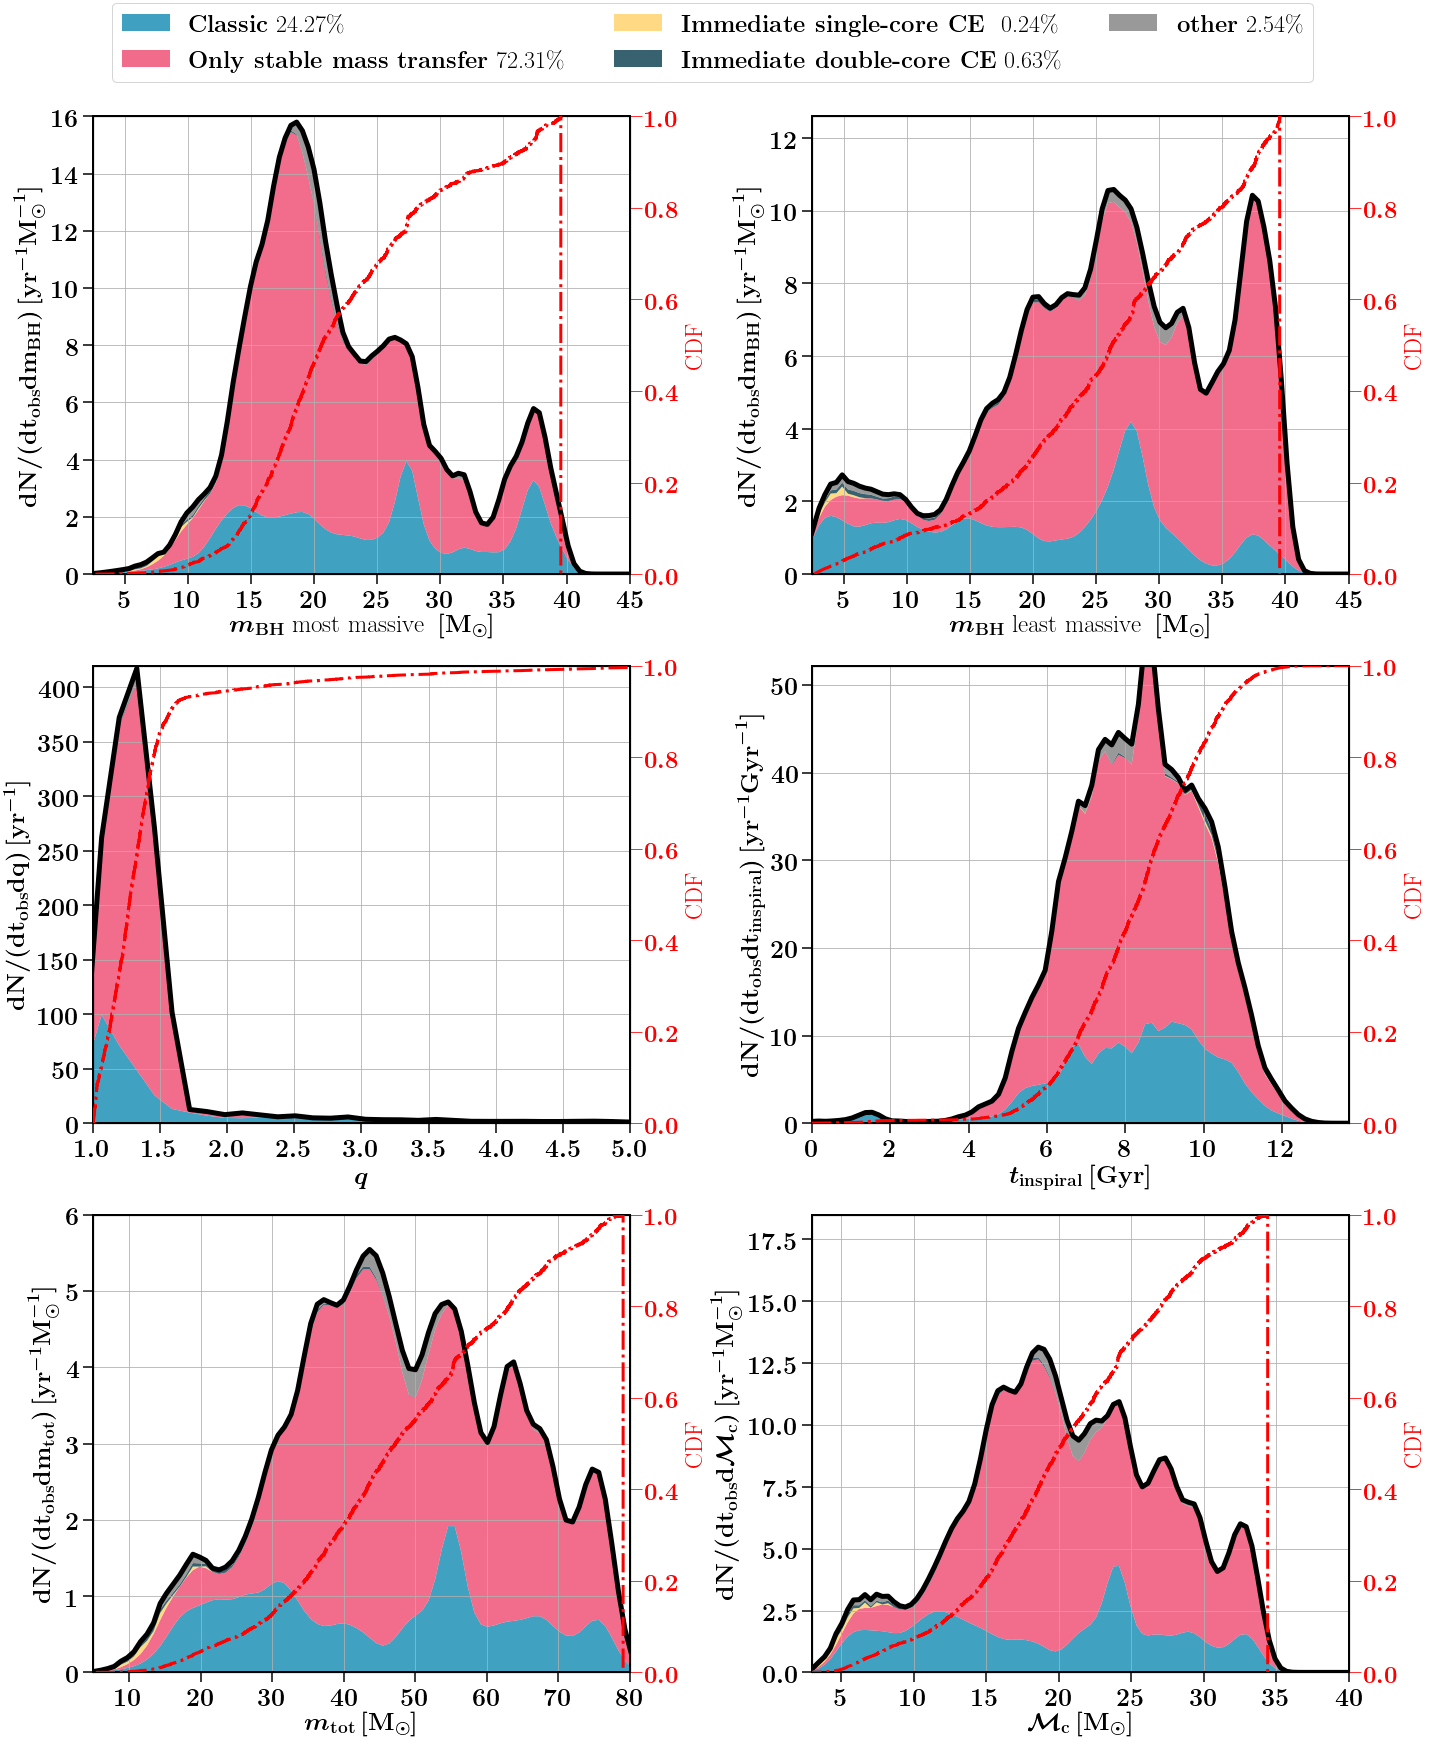

In [43]:


    
    
linewidth=3.5
ALPHA=0


f, ax= plt.subplots(ncols=2,nrows=3,figsize=(20,23), 
                  gridspec_kw={"width_ratios":[1.5, 1.5], "height_ratios":[2,2,2]})


#general
Nbins= .09 #.05#50 #.1 #50




####### BH MASS 
M1, M2 = Data.COMPAS.mass1, Data.COMPAS.mass2
MBH, MNS = obtainM1BHandM2BHassymetric(m1=M1, m2=M2)
xvar = M1
nameY = r'$ \rm{d}N /(\rm{d}t_{\rm{obs}} \rm{d}m_{\rm{BH}}) \, [\rm{yr}^{-1}  \rm{M}_{\odot}^{-1}]  $'
nameX = r' $m_{\rm{BH}}$ most massive $ \,  [\rm{M}_{\odot}]$'

handles, labels=plotdesigndistribution(axe=ax[0,0], xvar=xvar, nrbins=Nbins, xlabel=nameX, ylabel=nameY, \
                              xlim=[2.5,45], ylim=[0,16],indplot=0) 


####### NS MASS 
xvar = M1 + M2 - M1
nameY = r'$ \rm{d}N /(\rm{d}t_{\rm{obs}} \rm{d}m_{\rm{BH}}) \, [\rm{yr}^{-1}  \rm{M}_{\odot}^{-1}]  $'
nameX = r'$m_{\rm{BH}}$ least massive  $ \,  [\rm{M}_{\odot}]$ '

_,_=plotdesigndistribution(axe=ax[0,1], xvar=xvar, nrbins=Nbins, xlabel=nameX, ylabel=nameY, \
                              xlim=[2.5,45], ylim=[0,12.6],indplot=1) 




####### mass ratio
xvar = MBH/MNS
nameY = r'$ \rm{d}N /(\rm{d}t_{\rm{obs}} \rm{d}q) \, [\rm{yr}^{-1}]  $'
nameX = r'$q$'

_,_=plotdesigndistribution(axe=ax[1,0], xvar=xvar, nrbins=Nbins, xlabel=nameX, ylabel=nameY, \
                              xlim=[1,5], ylim=[0,420],indplot=2) 

######## INSPIRAL TIME
xvar = Data.COMPAS.tc / 1000
nameY = r'$ \rm{d}N /(\rm{d}t_{\rm{obs}} \rm{d}t_{\rm{inspiral}}) \, [\rm{yr}^{-1}  \rm{Gyr}^{-1}]  $'
nameX = r'$t_{\rm{inspiral}} \, [\rm{Gyr}]$'

_,_=plotdesigndistribution(axe=ax[1,1], xvar=xvar, nrbins=Nbins, xlabel=nameX, ylabel=nameY, \
                              xlim=[0,13.7], ylim=[0,52.2],indplot=3) 




####### mass total
xvar = MBH+MNS
nameY = r'$ \rm{d}N /(\rm{d}t_{\rm{obs}} \rm{d}m_{\rm{tot}}) \, [\rm{yr}^{-1}  \rm{M}_{\odot}^{-1}]  $'
nameX = r'$m_{\rm{tot}} \,  [\rm{M}_{\odot}]$'

_,_=plotdesigndistribution(axe=ax[2,0], xvar=xvar, nrbins=Nbins, xlabel=nameX, ylabel=nameY, \
                              xlim=[5,80], ylim=[0,6.0],indplot=4) 


####### mass chirp
xvar = chirpmass(MBH, MNS)
nameY = r'$ \rm{d}N /(\rm{d}t_{\rm{obs}} \rm{d}\mathcal{M}_{\rm{c}}) \, [\rm{yr}^{-1}  \rm{M}_{\odot}^{-1}]  $'
nameX = r'$\mathcal{M}_{\rm{c}} \,  [\rm{M}_{\odot}]$'

_,_=plotdesigndistribution(axe=ax[2,1], xvar=xvar, nrbins=Nbins, xlabel=nameX, ylabel=nameY, \
                              xlim=[3,40], ylim=[0,18.5], indplot=5) 

# ###########
# Nbins = 15
# xvar = Data.COMPAS.metallicitySystems
# solar=0.0142
# xvar = np.log10(xvar/solar)


# LEGEND

lgd = f.legend(handles, labels, fontsize=fs, ncol=3,\
         bbox_to_anchor=(.92, 1.06),  markerscale=3., scatterpoints=1) # loc = 'upper center')




# f.tight_layout(pad=0.4, w_pad=0.5, h_pad=0.5)





plt.tight_layout()
plt.subplots_adjust(wspace=0.34, hspace=0.2)
# plt.savefig('./ObservedDistributionsFiducial_channels_gaussianKDE_BNS.png', dpi=100, transparent=False)
plt.savefig('./ObservedDistributionsFiducial_channels_BBH.png', dpi=100, transparent=False,\
            bbox_extra_artists=(lgd,), bbox_inches='tight')
plt.show()
plt.close()






TypeError: plotdesigndistribution() takes exactly 8 arguments (7 given)

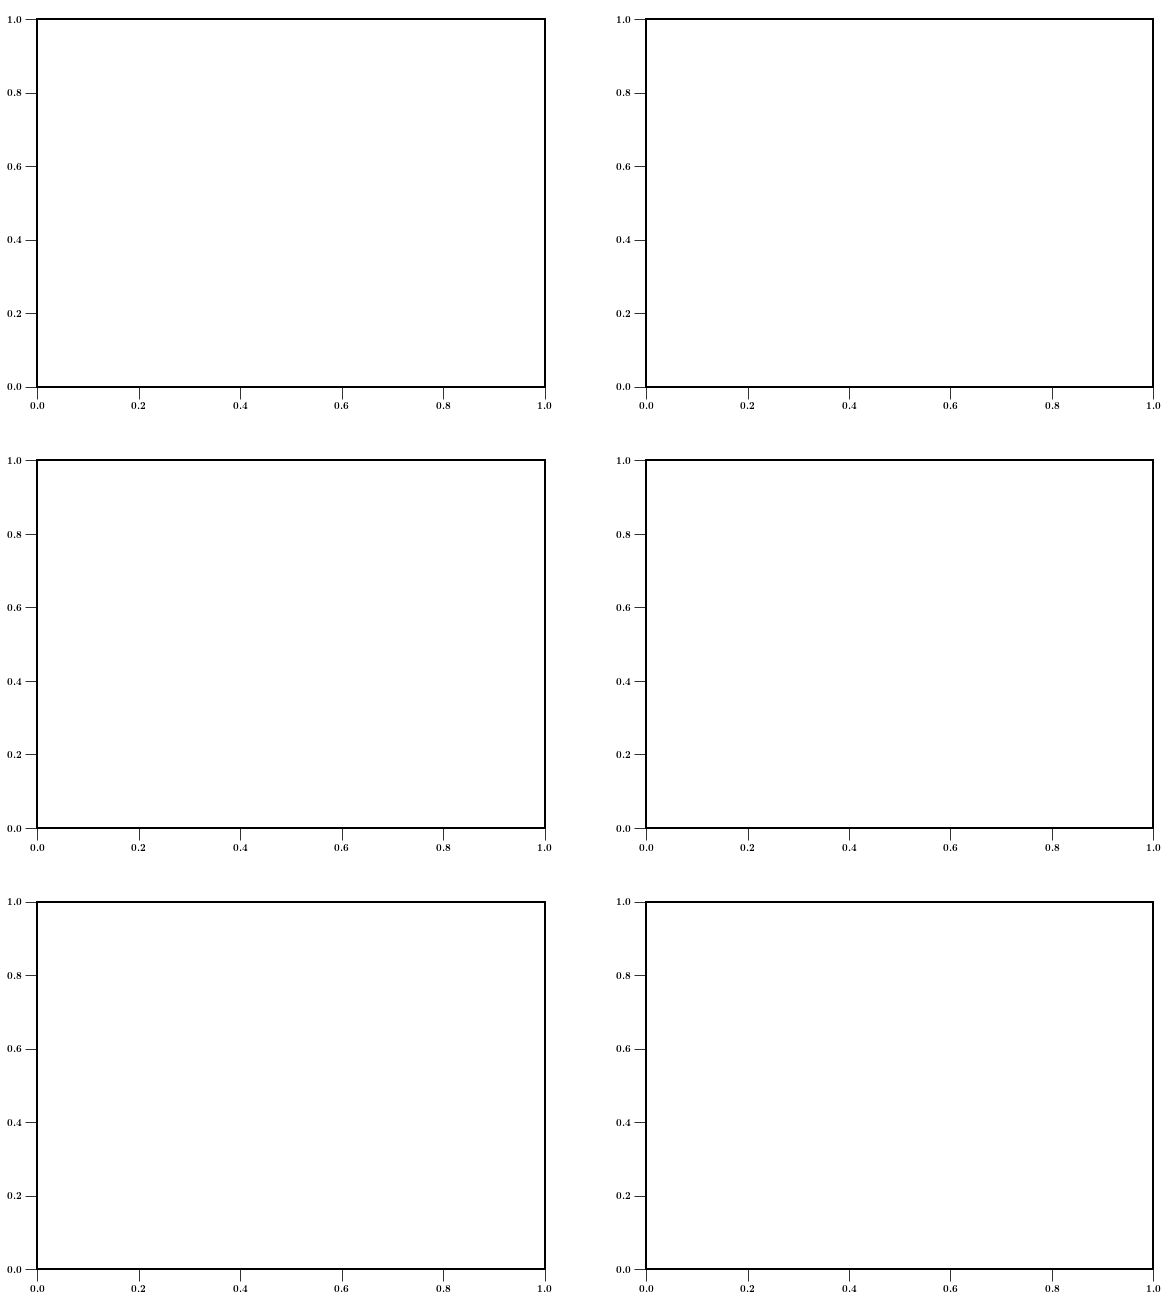

In [39]:
linewidth=3.5
ALPHA=0


f, ax= plt.subplots(ncols=2,nrows=3,figsize=(20,23), 
                  gridspec_kw={"width_ratios":[1.5, 1.5], "height_ratios":[2,2,2]})


#general
Nbins= .15 #.05#50 #.1 #50




####### BH MASS 

xvar = Data.COMPAS.metallicitySystems
solar=0.0142
xvar = np.log10(xvar/solar)

nameY = r'$ \rm{d}N /(\rm{d}t_{\rm{obs}} \rm{d}m_{\rm{BH}}) \, [\rm{yr}^{-1}  \rm{M}_{\odot}^{-1}]  $'
nameX = r' $m_{\rm{BH}}$ most massive $ \,  [\rm{M}_{\odot}^{-1}]$'

ax[0,0]=plotdesigndistribution(axe=ax[0,0], xvar=xvar, nrbins=Nbins, xlabel=nameX, ylabel=nameY, \
                              xlim=[-2,1], ylim=[0,200]) 


# ####### NS MASS 
# xvar = M1 + M2 - M1
# nameY = r'$ \rm{d}N /(\rm{d}t_{\rm{obs}} \rm{d}m_{\rm{BH}}) \, [\rm{yr}^{-1}  \rm{M}_{\odot}^{-1}]  $'
# nameX = r'$m_{\rm{BH}}$ least massive  $ \,  [\rm{M}_{\odot}^{-1}]$ '

# ax[0,1]=plotdesigndistribution(axe=ax[0,1], xvar=xvar, nrbins=Nbins, xlabel=nameX, ylabel=nameY, \
#                               xlim=[2.5,45], ylim=[0,12.6]) 




# ###########
# Nbins = 15
# xvar = Data.COMPAS.metallicitySystems
# solar=0.0142
# xvar = np.log10(xvar/solar)




plt.tight_layout()
plt.subplots_adjust(wspace=0.34, hspace=0.2)
# plt.savefig('./ObservedDistributionsFiducial_channels_gaussianKDE_BNS.png', dpi=100, transparent=False)
plt.savefig('./Observed_Metallicities_channels_BBH.png', dpi=100, transparent=False)
plt.show()
plt.close()



In [40]:




def plotMetallicities(axe):
    solar=0.0142
    groups  = dictChannelsBHNSList  

    axes = [axe]

    weightSTROOPWAFEL = Data.COMPAS.weight
    neff = 15
    xvar = Data.COMPAS.metallicitySystems
    xvar = np.log10(xvar/solar)
    
    binsM = np.linspace(-3 ,0.5, neff)
    dM    = np.diff(binsM)
    M     = (binsM[1:]+binsM[:-1])/2.




    # print len(chirp)
#     print np.shape(Data.PerSystemPerRedshift_ratesObserved)
    weights     = np.sum(Data.PerSystemPerRedshift_ratesObserved*weightSTROOPWAFEL, axis=0)
#     print np.sum(weights)
#     print weights

    #     fig, axes = plt.subplots(1,1,figsize=(16,8))
    yLow        = np.zeros(len(M))
    for nrG, group in enumerate(groups):
        m       = xvar[channelSystems == nrG]
        w       = weights[channelSystems == nrG]
        percentage = np.round((np.sum(w)/float(np.sum(weights)))*100,2)
        y, _    = np.histogram(m, bins=binsM, weights=w)
        y       = np.divide(y, dM)


        axe.fill_between(M, yLow, yLow+y, facecolor=colorlist[nrG],\
                          label=dictChannelsBHNSListBolt[nrG]+' '+str(percentage)+'\%')
        yLow   += y

        
        
    # plot Z values for some fixed metallicities
    text_list = [r'$Z=Z_{\odot}$', r'$Z=0.001$', r'$Z=0.004$' , r'$Z=0.002$']
    for zz_ind, zz in enumerate([0, np.log10(0.001/solar),\
                                 np.log10(0.004/solar), np.log10(0.002/solar)]) :
        axe.plot([zz,zz], [0,300], \
                         c='k',\
                         lw=2, alpha=1, linestyle=':', zorder=600)   
        axe.text(zz-0.05, 210.5, s=text_list[zz_ind], fontsize=fs-8, rotation=90, verticalalignment='top')

                
        
        
        
    axe.set_xlim(-2,0.3)
    axe.set_ylim(0,220)
    nameY = r'$\rm dN /(dt_{obs} dZ) \ [yr^{-1} ]  $'
    nameX = r'$ \log_{10}(Z/Z_{\odot}) $'

    axe == CV.layoutAxes(axe, nameX=nameX, nameY=nameY)


#     axe.grid(True)
    
    
    




def plotMetallicitiesLIN(axe):
    solar=0.0142
    groups  = dictChannelsBHNSList  

    axes = [axe]

    weightSTROOPWAFEL = Data.COMPAS.weight
    neff = 20
    xvar = Data.COMPAS.metallicitySystems
    xvar = (xvar/solar)
    
    binsM = np.linspace(0,1.5, neff)
    dM    = np.diff(binsM)
    M     = (binsM[1:]+binsM[:-1])/2.




    # print len(chirp)
#     print np.shape(Data.PerSystemPerRedshift_ratesObserved)
    weights     = np.sum(Data.PerSystemPerRedshift_ratesObserved*weightSTROOPWAFEL, axis=0)
#     print np.sum(weights)
#     print weights

    #     fig, axes = plt.subplots(1,1,figsize=(16,8))
    yLow        = np.zeros(len(M))
    for nrG, group in enumerate(groups):
        m       = xvar[channelSystems == nrG]
        w       = weights[channelSystems == nrG]
        percentage = np.round((np.sum(w)/float(np.sum(weights)))*100,2)
        y, _    = np.histogram(m, bins=binsM, weights=w)
        y       = np.divide(y, dM)


        axe.fill_between(M, yLow, yLow+y, facecolor=colorlist[nrG],\
                          label=dictChannelsBHNSListBolt[nrG]+' '+str(percentage)+'\%')
        yLow   += y

        
    # plot Z values for some fixed metallicities
    text_list = [r'$Z=Z_{\odot}$', r'$Z=0.001$', r'$Z=0.004$' , r'$Z=0.002$']
    for zz_ind, zz in enumerate([0, np.log10(0.001/solar),\
                                 np.log10(0.004/solar), np.log10(0.002/solar)]) :
        axe.plot([10**zz,10**zz], [0,1800], \
                         c='k',\
                         lw=2, alpha=1, linestyle=':', zorder=600)   
        axe.text((10**zz), 950, s=text_list[zz_ind], fontsize=fs-8,\
                 rotation=90, verticalalignment='top')

        
        
        
        axe.set_xlim(0,1.2)
    axe.set_ylim(0,1000)
    nameY = r'$\rm dN /(dt_{obs} dZ) \ [yr^{-1} ]  $'
    nameX = r'$ Z/Z_{\odot} $'

    axe == CV.layoutAxes(axe, nameX=nameX, nameY=nameY)


#     axe.grid(True)

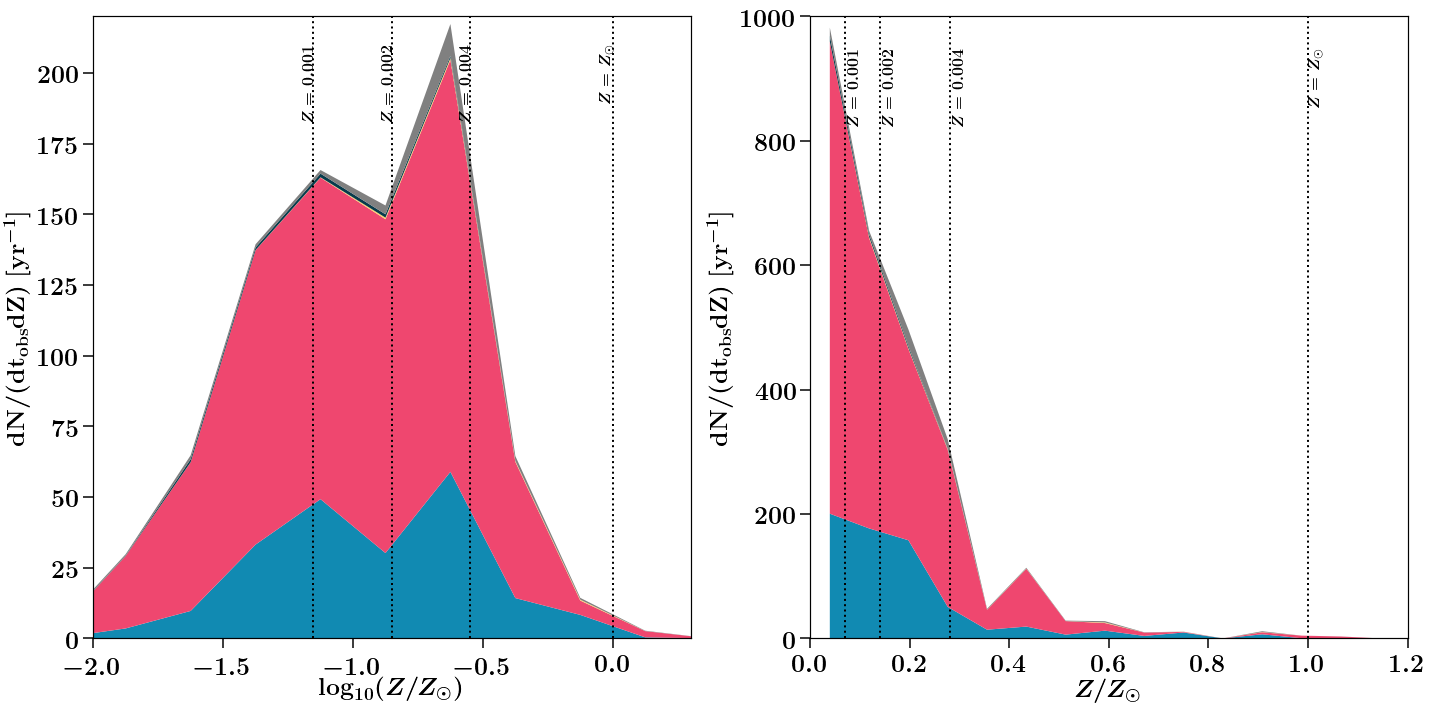

In [41]:
cale
c